<a href="https://colab.research.google.com/github/rizwan-mushtaq-blog/Project_CBS/blob/main/CCS_CBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Central Bank Independence and Climate change focus

In [6]:
import re
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
from contractions import fix
from bs4 import BeautifulSoup
import emoji
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
#!pip install contractions bs4 emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.5 MB/s eta 0:00:00


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Final_Project_CBS/CBS_dataset_v1.0.csv')
print(df.head())

                                            URL  PDF  \
0  https://www.cbaruba.org/readBlob.do?id=10756  NaN   
1   https://www.cbaruba.org/readBlob.do?id=7515  NaN   
2   https://www.cbaruba.org/readBlob.do?id=7518  NaN   
3   https://www.cbaruba.org/readBlob.do?id=7548  NaN   
4   https://www.cbaruba.org/readBlob.do?id=7554  NaN   

                                               Title Subtitle        Date  \
0  President speech Managing the Economy as if th...      NaN  2021-12-08   
1  Speech President of the CBA 4th Annual Future ...      NaN  2019-11-01   
2            Speech Symposium President Semeleer CBA      NaN  2019-09-06   
3                       Integrity Koninkrijk Seminar      NaN  2016-10-28   
4  Speech by the President at the BES seminar hel...      NaN  2010-03-29   

            Authorname      Role  Gender            CentralBank Country  \
0  Jeanette R Semeleer  Governor  Female  Central Bank of Aruba     ABW   
1  Jeanette R Semeleer  Governor  Female  Central 

In [ ]:
"""
# Preprocessing Function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    return ' '.join(lemmatized_tokens)
"""

                                            URL  PDF  \
0  https://www.cbaruba.org/readBlob.do?id=10756  NaN   
1   https://www.cbaruba.org/readBlob.do?id=7515  NaN   
2   https://www.cbaruba.org/readBlob.do?id=7518  NaN   
3   https://www.cbaruba.org/readBlob.do?id=7548  NaN   
4   https://www.cbaruba.org/readBlob.do?id=7554  NaN   

                                               Title Subtitle        Date  \
0  President speech Managing the Economy as if th...      NaN  2021-12-08   
1  Speech President of the CBA 4th Annual Future ...      NaN  2019-11-01   
2            Speech Symposium President Semeleer CBA      NaN  2019-09-06   
3                       Integrity Koninkrijk Seminar      NaN  2016-10-28   
4  Speech by the President at the BES seminar hel...      NaN  2010-03-29   

            Authorname      Role  Gender            CentralBank Country  \
0  Jeanette R Semeleer  Governor  Female  Central Bank of Aruba     ABW   
1  Jeanette R Semeleer  Governor  Female  Central 

In [16]:
def preprocess_text(text, remove_numbers=True, remove_urls=True, remove_emails=True,
                   fix_contractions=True, remove_html=True, handle_emojis=True,
                   min_word_length=2):
    """
    Advanced text preprocessing function with multiple cleaning options.

    Parameters:
        text (str): Input text to preprocess
        remove_numbers (bool): Whether to remove numbers
        remove_urls (bool): Whether to remove URLs
        remove_emails (bool): Whether to remove email addresses
        fix_contractions (bool): Whether to expand contractions
        remove_html (bool): Whether to remove HTML tags
        handle_emojis (bool): Whether to convert emojis to text
        min_word_length (int): Minimum length of words to keep
    """
    try:
        # Handle None or empty text
        if not text or pd.isna(text):
            return ""

        # Convert to string if not already
        text = str(text)

        # Remove HTML tags
        if remove_html:
            text = BeautifulSoup(text, "html.parser").get_text()

        # Fix contractions (e.g., "don't" -> "do not")
        if fix_contractions:
            text = fix(text)

        # Convert emojis to text
        if handle_emojis:
            text = emoji.demojize(text)
            text = re.sub(r':', ' ', text)  # Remove colons around emoji text
            text = re.sub(r'_', ' ', text)  # Replace underscores with spaces

        # Remove URLs
        if remove_urls:
            text = re.sub(r'http\S+|www.\S+', '', text)

        # Remove email addresses
        if remove_emails:
            text = re.sub(r'\S+@\S+', '', text)

        # Convert to lowercase
        text = text.lower()

        # Normalize unicode characters
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')

        # Remove numbers if specified
        if remove_numbers:
            text = re.sub(r'\d+', '', text)

        # Remove special characters but keep apostrophes for contractions
        text = re.sub(r'[^a-zA-Z\s\']', ' ', text)

        # Remove single quotes if they are not part of contractions
        text = re.sub(r'\s\'|\'\s', ' ', text)

        # Tokenize text
        tokens = word_tokenize(text)

        # Get stop words
        stop_words = set(stopwords.words('english'))

        # Custom stopwords (can be modified as needed)
        custom_stopwords = {'amp', 'rt', 'via'}
        stop_words.update(custom_stopwords)

        # Remove stopwords and short words
        tokens = [word for word in tokens
                 if word not in stop_words
                 and len(word) >= min_word_length]

        # Initialize lemmatizer with pos tagging for better accuracy
        lemmatizer = WordNetLemmatizer()

        # POS tagging for more accurate lemmatization
        pos_tags = nltk.pos_tag(tokens)

        # Convert POS tags to WordNet POS tags
        lemmatized_tokens = []
        for word, tag in pos_tags:
            if tag.startswith('J'):
                pos = nltk.corpus.wordnet.ADJ
            elif tag.startswith('V'):
                pos = nltk.corpus.wordnet.VERB
            elif tag.startswith('N'):
                pos = nltk.corpus.wordnet.NOUN
            elif tag.startswith('R'):
                pos = nltk.corpus.wordnet.ADV
            else:
                pos = nltk.corpus.wordnet.NOUN

            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos=pos))

        # Remove repeated characters (e.g., 'goooood' -> 'good')
        lemmatized_tokens = [re.sub(r'(.)\1+', r'\1', token) for token in lemmatized_tokens]

        # Join tokens back into text
        processed_text = ' '.join(lemmatized_tokens)

        # Remove extra whitespace
        processed_text = ' '.join(processed_text.split())

        return processed_text

    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return text  # Return original text if processing fails


In [17]:
# apply the preprocess_text function on the column text from the df

df['processed_text'] = df['text'].apply(preprocess_text)
print(df.head())

                                            URL  PDF  \
0  https://www.cbaruba.org/readBlob.do?id=10756  NaN   
1   https://www.cbaruba.org/readBlob.do?id=7515  NaN   
2   https://www.cbaruba.org/readBlob.do?id=7518  NaN   
3   https://www.cbaruba.org/readBlob.do?id=7548  NaN   
4   https://www.cbaruba.org/readBlob.do?id=7554  NaN   

                                               Title Subtitle        Date  \
0  President speech Managing the Economy as if th...      NaN  2021-12-08   
1  Speech President of the CBA 4th Annual Future ...      NaN  2019-11-01   
2            Speech Symposium President Semeleer CBA      NaN  2019-09-06   
3                       Integrity Koninkrijk Seminar      NaN  2016-10-28   
4  Speech by the President at the BES seminar hel...      NaN  2010-03-29   

            Authorname      Role  Gender            CentralBank Country  \
0  Jeanette R Semeleer  Governor  Female  Central Bank of Aruba     ABW   
1  Jeanette R Semeleer  Governor  Female  Central 

In [18]:
#save the df as pre_processed in csv formate
# Assuming the code you provided is already executed and df is available

df.to_csv('pre_processed.csv', index=False)

In [20]:
import pandas as pd

In [21]:
# Create lists of keywords and their corresponding speech counts
data = {
    'Keyword': [
        'abrupt transition', 'carbon price', 'carbon taxes', 'climate aligned',
        'climate damage', 'climate events', 'climate finance', 'climate hazard',
        'climate metrics', 'climate protection', 'climate risks', 'climate sensitivity',
        'climate stress test', 'climatology', 'decarbonising', 'decarbonizing',
        'environmental risks', 'green bond', 'green finances', 'green policies',
        'green supporting factor', 'green technologies', 'greener', 'ngfs',
        'stranded asset', 'sustainable investing',
        # Second column
        'brown penalising factors', 'carbon prices', 'climate action', 'climate change',
        'climate data', 'climate exposure', 'climate friendly', 'climate hazards',
        'climate minsky moment', 'climate related', 'climate scenario', 'climate shock',
        'climate stress tests', 'cofco', 'decarbonization', 'disorderly transition',
        'environmental risk', 'green bonds', 'green investment', 'green policy',
        'green supporting factors', 'green technology', 'greenhouse', 'paris agreement',
        'stranded assets', 'tcfd',
        # Third column
        'carbon emission', 'carbon pricing', 'climate action', 'climate changes',
        'climate economics', 'climate exposures', 'climate goals', 'climate impact',
        'climate policies', 'climate relevant', 'climate scenarios', 'climate shocks',
        'climatologist', 'decarbonise', 'decarbonize', 'disorderly transitions',
        'environmental risks', 'green economy', 'green investments', 'green qe',
        'green swan', 'green transition', 'greening', 'physical risk',
        'sustainable finance', 'transition risk',
        # Fourth column
        'carbon emissions', 'carbon tax', 'climate adaptation', 'climate crisis',
        'climate event', 'climate extremes', 'climate harm', 'climate impacts',
        'climate policy', 'climate risk', 'climate science', 'climate taxonomy',
        'climatologists', 'decarbonized', 'environment risk', 'global warming',
        'green finance', 'green monetary', 'green quantitative easing', 'green swans',
        'green transitions', 'low carbon', 'physical risks', 'sustainable finances',
        'transition risks'
    ],
    'Speeches_#': [
        19, 62, 62, 8, 2, 60, 75, 2, 5, 57, 480, 3, 63, 6, 23, 6, 3, 240, 1, 10,
        10, 82, 325, 357, 4, 50,
        # Second column values
        3, 56, 177, 2007, 47, 1, 56, 7, 15, 745, 50, 1, 51, 3, 59, 51, 122, 300,
        114, 13, 5, 48, 378, 274, 68, 139,
        # Third column values
        68, 92, 19, 34, 5, 7, 67, 44, 108, 6, 110, 25, 2, 4, 9, 4, 276, 115,
        118, 6, 27, 254, 529, 91, 607, 117,
        # Fourth column values
        265, 72, 29, 122, 4, 6, 1, 19, 151, 432, 20, 3, 7, 9, 4, 341, 458, 6,
        10, 8, 7, 432, 237, 12, 310
    ]
}

In [22]:
# Create DataFrame
df_keywords = pd.DataFrame(data)
df_keywords.head()

,Keyword,Speeches_#
0,abrupt transition,19
1,carbon price,62
2,carbon taxes,62
3,climate aligned,8
4,climate damage,2


In [23]:
# apply the preprocess_text function on the column text from the df

df_keywords['processed_keywords'] = df_keywords['Keyword'].apply(preprocess_text)
df_keywords.head()

,Keyword,Speeches_#,processed_keywords
0,abrupt transition,19,abrupt transition
1,carbon price,62,carbon price
2,carbon taxes,62,carbon tax
3,climate aligned,8,climate align
4,climate damage,2,climate damage


In [26]:
# function to run at the end of file....
result_df = count_words_in_dataframe(
    df=df,
    word_list=df_keywords['processed_keywords'],
    text_column='processed_text' # Pass the column name as a string
)


100%|██████████| 36/36 [21:24<00:00, 35.67s/it]


In [ ]:
result_df.head()

,URL,PDF,Title,Subtitle,Date,Authorname,Role,Gender,CentralBank,Country,...,freq_climat crisi,freq_climat extrem,freq_climat harm,freq_climat scienc,freq_climat taxonomi,freq_environ risk,freq_global warm,freq_green monetari,freq_green quantit ea,freq_low carbon
0,https://www.cbaruba.org/readBlob.do?id=10756,NaN,President speech Managing the Economy as if th...,NaN,2021-12-08,Jeanette R Semeleer,Governor,Female,Central Bank of Aruba,ABW,...,0,0,0,0,0,0,0,0,0,0
1,https://www.cbaruba.org/readBlob.do?id=7515,NaN,Speech President of the CBA 4th Annual Future ...,NaN,2019-11-01,Jeanette R Semeleer,Governor,Female,Central Bank of Aruba,ABW,...,1,0,0,0,0,0,0,0,0,0
2,https://www.cbaruba.org/readBlob.do?id=7518,NaN,Speech Symposium President Semeleer CBA,NaN,2019-09-06,Jeanette R Semeleer,Governor,Female,Central Bank of Aruba,ABW,...,0,0,0,0,0,0,0,0,0,0
3,https://www.cbaruba.org/readBlob.do?id=7548,NaN,Integrity Koninkrijk Seminar,NaN,2016-10-28,Jeanette R Semeleer,Governor,Female,Central Bank of Aruba,ABW,...,0,0,0,0,0,0,0,0,0,0
4,https://www.cbaruba.org/readBlob.do?id=7554,NaN,Speech by the President at the BES seminar hel...,NaN,2010-03-29,Jeanette R Semeleer,Governor,Female,Central Bank of Aruba,ABW,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# save the result_df as matched_df in a csv file

result_df.to_csv('matched_df.csv', index=False)


## Both dataset have been saved as Preprocessed and matched_df...we can import both csv...directly for further processing....

In [28]:
# take the sum of the rows for those column names which start from freq, keep the remaining columns without any change

def count_words_in_dataframe(df, word_list, text_column):
    word_counts = pd.DataFrame()
    for word in word_list:
        word_counts[word] = df[text_column].str.count(word)
    return pd.concat([df, word_counts], axis=1)

In [30]:
# Assuming 'result_df' is your DataFrame from the previous code
# and it contains columns starting with 'freq'
freq_cols = [col for col in result_df.columns if col.startswith('freq')]

if freq_cols:
  result_df['sum_of_freqs'] = result_df[freq_cols].sum(axis=1)

In [31]:
result_df.head()

,URL,PDF,Title,Subtitle,Date,Authorname,Role,Gender,CentralBank,Country,...,freq_climate extreme,freq_climate harm,freq_climate science,freq_climate taxonomy,freq_environment risk,freq_global warming,freq_gren monetary,freq_gren quantitative easing,freq_low carbon,sum_of_freqs
0,https://www.cbaruba.org/readBlob.do?id=10756,NaN,President speech Managing the Economy as if th...,NaN,2021-12-08,Jeanette R Semeleer,Governor,Female,Central Bank of Aruba,ABW,...,0,0,0,0,0,0,0,0,0,1
1,https://www.cbaruba.org/readBlob.do?id=7515,NaN,Speech President of the CBA 4th Annual Future ...,NaN,2019-11-01,Jeanette R Semeleer,Governor,Female,Central Bank of Aruba,ABW,...,0,0,0,0,0,0,0,0,0,16
2,https://www.cbaruba.org/readBlob.do?id=7518,NaN,Speech Symposium President Semeleer CBA,NaN,2019-09-06,Jeanette R Semeleer,Governor,Female,Central Bank of Aruba,ABW,...,0,0,0,0,0,0,0,0,0,1
3,https://www.cbaruba.org/readBlob.do?id=7548,NaN,Integrity Koninkrijk Seminar,NaN,2016-10-28,Jeanette R Semeleer,Governor,Female,Central Bank of Aruba,ABW,...,0,0,0,0,0,0,0,0,0,0
4,https://www.cbaruba.org/readBlob.do?id=7554,NaN,Speech by the President at the BES seminar hel...,NaN,2010-03-29,Jeanette R Semeleer,Governor,Female,Central Bank of Aruba,ABW,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Display descriptive statistics for the 'Date' column
result_df['Date'].describe()

,Date
count,35487
unique,8879
top,2022-09-29
freq,23


In [33]:
# take the average of "sum_of_freqs" column by Date for each year and by country

import pandas as pd

# Assuming 'result_df' is your DataFrame from the previous code
# Convert 'Date' column to datetime objects if it's not already
result_df['Date'] = pd.to_datetime(result_df['Date'])

# Extract year and month from the 'Date' column
result_df['year'] = result_df['Date'].dt.year

In [34]:
# Calculate average of X by year and country
df_averaged = result_df.groupby(['Country', 'year'])['sum_of_freqs'].mean().reset_index()

In [35]:
df_averaged.head()

,Country,year,sum_of_freqs
0,ABW,2004,0.0
1,ABW,2009,0.0
2,ABW,2010,0.0
3,ABW,2016,0.0
4,ABW,2017,0.0


In [36]:
# prompt: now merge average_freqs and  result_df dataframes on Country and Year, assume averge_freqs is the master dataframe

# Merge average_freqs and result_df
merged_df = pd.merge(df_averaged, result_df, on=['Country', 'year'], how='left')

merged_df.head()


,Country,year,sum_of_freqs_x,URL,PDF,Title,Subtitle,Date,Authorname,Role,...,freq_climate extreme,freq_climate harm,freq_climate science,freq_climate taxonomy,freq_environment risk,freq_global warming,freq_gren monetary,freq_gren quantitative easing,freq_low carbon,sum_of_freqs_y
0,ABW,2004,0.0,https://www.cbaruba.org/readBlob.do?id=7608,NaN,Speech by drs K Polvliet on the opening of Atr...,NaN,2004-04-23,K Polvliet,Board member,...,0,0,0,0,0,0,0,0,0,0
1,ABW,2004,0.0,https://www.cbaruba.org/readBlob.do?id=7647,NaN,Speech at launch of the Annual Report 2003,NaN,2004-06-10,A Caram,Governor,...,0,0,0,0,0,0,0,0,0,0
2,ABW,2004,0.0,https://www.cbaruba.org/readBlob.do?id=7671,NaN,Address on the official opening of the new Ar...,NaN,2004-11-20,R Henriquez,Governor,...,0,0,0,0,0,0,0,0,0,0
3,ABW,2009,0.0,https://www.bis.org/review/r091216e.pdf,https://www.bis.org/review/r091216e.pdf,To dollarize or not to dollarize - the Central...,"Speech by Ms Jeanette R Semeleer, President of...",2009-08-24,Jeanette R Semeleer,Governor,...,0,0,0,0,0,0,0,0,0,0
4,ABW,2010,0.0,https://www.cbaruba.org/readBlob.do?id=7554,NaN,Speech by the President at the BES seminar hel...,NaN,2010-03-29,Jeanette R Semeleer,Governor,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# prompt: save the merged_df as csv

merged_df.to_csv('merged_df.csv', index=False)


# We can now import directly merged_df, if restarted the notebook


In [3]:
# prompt: import merged_df.csv here

import pandas as pd
merged_df = pd.read_csv('/content/drive/MyDrive/Final_Project_CBS/merged_df.csv')
print(merged_df.head())


  Country  year  sum_of_freqs_x                                          URL  \
0     ABW  2004             0.0  https://www.cbaruba.org/readBlob.do?id=7608   
1     ABW  2004             0.0  https://www.cbaruba.org/readBlob.do?id=7647   
2     ABW  2004             0.0  https://www.cbaruba.org/readBlob.do?id=7671   
3     ABW  2009             0.0      https://www.bis.org/review/r091216e.pdf   
4     ABW  2010             0.0  https://www.cbaruba.org/readBlob.do?id=7554   

                                       PDF  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3  https://www.bis.org/review/r091216e.pdf   
4                                      NaN   

                                               Title  \
0  Speech by drs K Polvliet on the opening of Atr...   
1         Speech at launch of the Annual Report 2003   
2  Address  on the official opening of the new Ar...   
3  To dollarize or

In [4]:
# prompt: provide descriptive statistics of sum_of_freqs_x and sum_of_freqs_y

# Assuming 'result_df' is your DataFrame and it contains columns 'sum_of_freqs_x' and 'sum_of_freqs_y'
# Calculate descriptive statistics for 'sum_of_freqs_x'
print(merged_df['sum_of_freqs_x'].describe())

# Calculate descriptive statistics for 'sum_of_freqs_y'
print(merged_df['sum_of_freqs_y'].describe())


count    35487.000000
mean         1.142503
std          2.908507
min          0.000000
25%          0.009709
50%          0.068182
75%          0.400000
max         72.000000
Name: sum_of_freqs_x, dtype: float64
count    35487.000000
mean         1.142503
std          7.478773
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        257.000000
Name: sum_of_freqs_y, dtype: float64


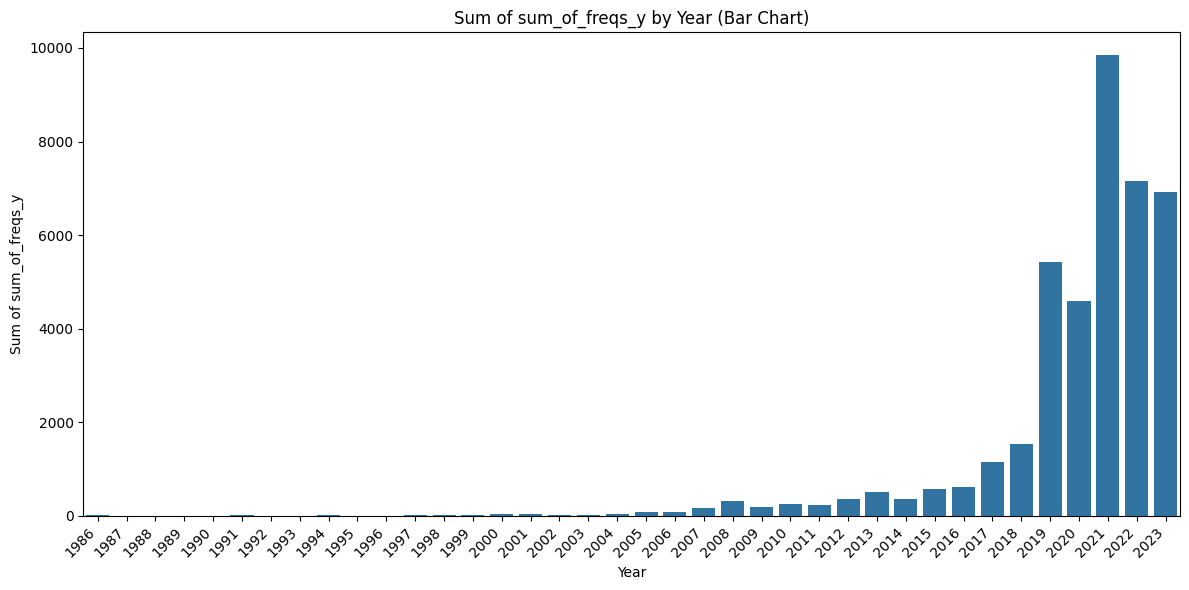

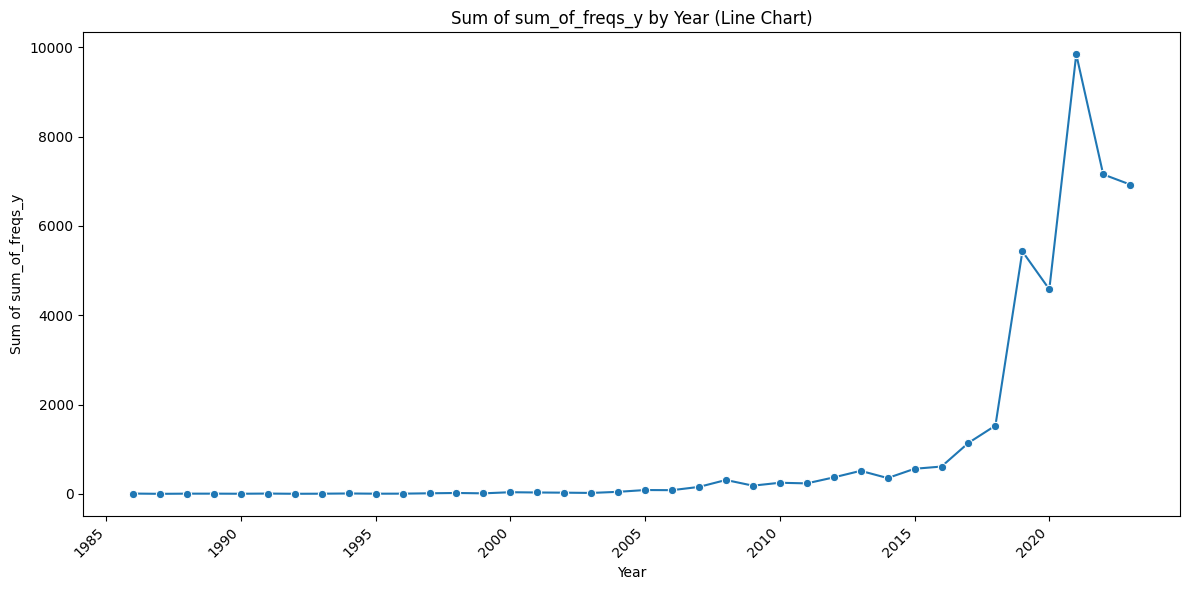

In [41]:
# prompt: prepare a bar and line chart to visualize sum_of_freqs_y by year

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your DataFrame and it contains columns 'year' and 'sum_of_freqs_y'
# Group the data by year and calculate the sum of 'sum_of_freqs_y' for each year
yearly_sums = merged_df.groupby('year')['sum_of_freqs_y'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='sum_of_freqs_y', data=yearly_sums)
plt.title('Sum of sum_of_freqs_y by Year (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Sum of sum_of_freqs_y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sum_of_freqs_y', data=yearly_sums, marker='o')
plt.title('Sum of sum_of_freqs_y by Year (Line Chart)')
plt.xlabel('Year')
plt.ylabel('Sum of sum_of_freqs_y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [1]:
##import the following excel file from the path "/content/drive/MyDrive/Final_Project_CBS/CBIData_Romelli_2024.xlsx" sheet CBI data

import pandas as pd
# Assuming 'df' is your DataFrame from the previous code
# and it contains columns starting with 'freq'
# ... (rest of your existing code)

#import the following excel file from the path "/content/drive/MyDrive/Final_Project_CBS/CBIData_Romelli_2024.xlsx" sheet CBI data

# Specify the sheet name
df_cbi = pd.read_excel('/content/drive/MyDrive/Final_Project_CBS/CBIData_Romelli_2024.xlsx', sheet_name='CBI data')
print(df_cbi.head())


       country  year iso_a3  imf_country_code  cbie_index  cbie_index_ref  \
0  Afghanistan  2003    AFG               512        0.87             NaN   
1  Afghanistan  2004    AFG               512        0.87             0.0   
2  Afghanistan  2005    AFG               512        0.87             0.0   
3  Afghanistan  2006    AFG               512        0.87             0.0   
4  Afghanistan  2007    AFG               512        0.87             0.0   

   cbie_board  cbie_board_ref  cbie_board_q1  cbie_board_q2  ...  \
0        0.69             NaN            0.5            0.5  ...   
1        0.69             0.0            0.5            0.5  ...   
2        0.69             0.0            0.5            0.5  ...   
3        0.69             0.0            0.5            0.5  ...   
4        0.69             0.0            0.5            0.5  ...   

   cbie_finindep_q12  cbie_report  cbie_report_ref  cbie_report_q1  \
0                  1          1.0              NaN        

In [5]:
# prompt: check the data shape

#print(df.shape)
#print(df_keywords.shape)
#print(result_df.shape)
print(merged_df.shape)
df_cbi.shape

(35487, 89)


(8094, 64)

In [6]:
df_cbi = df_cbi.rename(columns={'Country': 'Count'})


In [7]:
df_cbi = df_cbi.rename(columns={'iso_a3': 'Country', 'Year':'year'})


In [8]:
df_cbi.head()

,country,year,Country,imf_country_code,cbie_index,cbie_index_ref,cbie_board,cbie_board_ref,cbie_board_q1,cbie_board_q2,...,cbie_finindep_q12,cbie_report,cbie_report_ref,cbie_report_q1,cbie_report_q2,cbie_gmt,cbie_cwn_lvau,cbie_cwn_lvaw,cbie_cwne,cbie_cbiconstitution
0,Afghanistan,2003,AFG,512,0.87,NaN,0.69,NaN,0.5,0.5,...,1,1.0,NaN,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
1,Afghanistan,2004,AFG,512,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
2,Afghanistan,2005,AFG,512,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
3,Afghanistan,2006,AFG,512,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0
4,Afghanistan,2007,AFG,512,0.87,0.0,0.69,0.0,0.5,0.5,...,1,1.0,0.0,1.0,1.0,0.75,0.932,0.904,0.9065,1.0


In [9]:
# prompt: now merge df_cbi, merged_df on Country and Year, assume df_cbi is the master dataframe and ignore the index

import pandas as pd
# Merge df_cbi and merged_df on 'Country' and 'Year', using df_cbi as the master dataframe and ignoring the index
merged_df1 = pd.merge(df_cbi, merged_df, on=['Country', 'year'], how='left')

merged_df1.head()

,country,year,Country,imf_country_code,cbie_index,cbie_index_ref,cbie_board,cbie_board_ref,cbie_board_q1,cbie_board_q2,...,freq_climate extreme,freq_climate harm,freq_climate science,freq_climate taxonomy,freq_environment risk,freq_global warming,freq_gren monetary,freq_gren quantitative easing,freq_low carbon,sum_of_freqs_y
0,Afghanistan,2003,AFG,512,0.87,NaN,0.69,NaN,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2004,AFG,512,0.87,0.0,0.69,0.0,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2005,AFG,512,0.87,0.0,0.69,0.0,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2006,AFG,512,0.87,0.0,0.69,0.0,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2007,AFG,512,0.87,0.0,0.69,0.0,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
merged_df1.shape

(37235, 151)

In [ ]:
merged_df1.shape

(37235, 150)

In [11]:
merged_df1[['cbie_index','sum_of_freqs_x','sum_of_freqs_y']].describe()

,cbie_index,sum_of_freqs_x,sum_of_freqs_y
count,37235.000000,30910.000000,30910.000000
mean,0.641286,1.105500,1.105500
std,0.171466,2.788275,7.300723
min,0.098500,0.000000,0.000000
25%,0.533000,0.014085,0.000000
50%,0.614000,0.068421,0.000000
75%,0.791000,0.402985,0.000000
max,0.929000,72.000000,257.000000


In [13]:
# prompt: now apply the  ordinary least square regression by taking sum_freqs as dependent variable and cbie_index as independent variable in the ordinary least square regression, assume that thare NaN in the columns

import statsmodels.api as sm

# Prepare the data for regression
X = merged_df1['cbie_index']
y = merged_df1['sum_of_freqs_y']

# Remove rows with NaN values in both X and y
merged_df1_filtered = merged_df1.dropna(subset=['cbie_index', 'sum_of_freqs_y'])

X = merged_df1_filtered['cbie_index']
y = merged_df1_filtered['sum_of_freqs_y']

# Add a constant to the independent variable
X = sm.add_constant(X)



In [14]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         sum_of_freqs_y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     32.45
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           1.23e-08
Time:                        10:46:40   Log-Likelihood:            -1.0529e+05
No. Observations:               30910   AIC:                         2.106e+05
Df Residuals:                   30908   BIC:                         2.106e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1757      0.168      1.044      0.2

In [16]:
# prompt: add Country and Year variables in the previous regression

# Prepare the data for regression, including 'Country' and 'Year'
import statsmodels.formula.api as smf

# Define the formula for the regression model
formula = 'sum_of_freqs_y ~ cbie_index + C(Country) + C(year)'

# Remove rows with NaN values in relevant columns
merged_df1_filtered = merged_df1.dropna(subset=['cbie_index', 'sum_of_freqs_y', 'Country', 'year'])

# Fit the OLS model using the formula
model = smf.ols(formula, data=merged_df1_filtered).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         sum_of_freqs_y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     17.05
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:47:26   Log-Likelihood:            -1.0414e+05
No. Observations:               30910   AIC:                         2.086e+05
Df Residuals:                   30767   BIC:                         2.098e+05
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5882      1.31

## Function to match the keywords in the preprocessed column and provide the frequncy of keywords apeared in the preprocessed text.

In [24]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from typing import List, Dict, Set
from tqdm import tqdm

def prepare_word_patterns(word_list: List[str], case_sensitive: bool = False) -> Dict[str, re.Pattern]:
    """
    Create compiled regex patterns for each word.

    Args:
        word_list: List of words to search for
        case_sensitive: Whether to perform case-sensitive matching
    Returns:
        Dictionary of compiled regex patterns
    """
    words = word_list if case_sensitive else [w.lower() for w in word_list]
    return {
        word: re.compile(r'\b' + re.escape(word) + r'\b',
                        flags=0 if case_sensitive else re.IGNORECASE)
        for word in words
    }

def count_words_in_text(text: str,
                       word_patterns: Dict[str, re.Pattern],
                       case_sensitive: bool = False) -> Dict[str, int]:
    """
    Count frequency of target words in a single text document.

    Args:
        text: Input text to analyze
        word_patterns: Dictionary of compiled regex patterns
        case_sensitive: Whether to perform case-sensitive matching
    Returns:
        Dictionary with word counts
    """
    if not isinstance(text, str):
        return {word: 0 for word in word_patterns.keys()}

    if not case_sensitive:
        text = text.lower()

    return {
        word: len(pattern.findall(text))
        for word, pattern in word_patterns.items()
    }

def process_batch(texts: List[str],
                 word_patterns: Dict[str, re.Pattern],
                 case_sensitive: bool = False) -> List[Dict[str, int]]:
    """
    Process a batch of texts and count word frequencies.

    Args:
        texts: List of text documents
        word_patterns: Dictionary of compiled regex patterns
        case_sensitive: Whether to perform case-sensitive matching
    Returns:
        List of dictionaries containing word counts for each document
    """
    return [
        count_words_in_text(text, word_patterns, case_sensitive)
        for text in texts
    ]

def count_words_in_dataframe(df: pd.DataFrame,
                           word_list: List[str],
                           text_column: str,
                           batch_size: int = 1000,
                           case_sensitive: bool = False) -> pd.DataFrame:
    """
    Process entire dataframe and count word frequencies for each document.

    Args:
        df: Input dataframe
        word_list: List of words to search for
        text_column: Name of column containing text
        batch_size: Number of documents to process in each batch
        case_sensitive: Whether to perform case-sensitive matching
    Returns:
        DataFrame with word frequency columns added
    """
    # Prepare patterns once for all documents
    word_patterns = prepare_word_patterns(word_list, case_sensitive)

    # Create result columns
    result_df = df.copy()
    for word in word_list:
        result_df[f'freq_{word}'] = 0

    # Process in batches
    for start_idx in tqdm(range(0, len(df), batch_size)):
        end_idx = min(start_idx + batch_size, len(df))
        batch_texts = df.iloc[start_idx:end_idx][text_column].tolist()

        # Get counts for batch
        batch_counts = process_batch(batch_texts, word_patterns, case_sensitive)

        # Update dataframe with counts
        for i, counts in enumerate(batch_counts):
            idx = start_idx + i
            for word, count in counts.items():
                result_df.iloc[idx, result_df.columns.get_loc(f'freq_{word}')] = count

    return result_df

def calculate_corpus_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate corpus-level statistics for word frequencies.

    Args:
        df: DataFrame with frequency columns
    Returns:
        Statistics DataFrame
    """
    freq_cols = [col for col in df.columns if col.startswith('freq_')]

    stats_df = pd.DataFrame({
        'total_occurrences': df[freq_cols].sum(),
        'documents_with_word': (df[freq_cols] > 0).sum(),
        'mean_freq_when_present': df[freq_cols].replace(0, np.nan).mean(),
        'max_frequency': df[freq_cols].max()
    })

    stats_df.index = [col.replace('freq_', '') for col in freq_cols]
    return stats_df

def get_top_occurring_documents(df: pd.DataFrame,
                              word: str,
                              n: int = 5) -> pd.DataFrame:
    """
    Get the top n documents where a specific word occurs most frequently.

    Args:
        df: DataFrame with frequency columns
        word: Word to analyze
        n: Number of top documents to return
    Returns:
        DataFrame with top n documents
    """
    freq_col = f'freq_{word}'
    if freq_col not in df.columns:
        raise ValueError(f"Frequency column for word '{word}' not found")

    return df.nlargest(n, freq_col)